#  IDEA LAB 5th Weekly Seminar Conference Code File
## Numpy - KNN From Scratch in Python
<h3> Writer: Su-Yeon Kang </h3>

부연 설명: 기존의 'KNN From Scratch in Python' 코드에서는 판다스를 이용해서 공분산을 구하였고,
해당 코드에서는 넘파이를 이용하여 공분산을 구한 점에서 차이가 있습니다.

### 2022.08.02 ###


In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<h1>KNN Algorithm</h1>
유형: 지도학습

분류 항목을 이미 알고 있는 데이터 집합에서 상위 K개의 가장 유사한 데이터를 살펴보고, 

K개의 가장 유사한 데이터들 중 다수결(majority vote)를 통해 새로운 데이터의 분류 항목을 결정하는 알고리즘

## 예제 데이터 )  영화 분석 결과



#### 데이터 ) 각 영화 별 싸움 횟수와 키스 횟수

| 영화 제목 | the number of Kick | The number os Kiss | Type |
| ------  | ----| ----| --- |
| 냉정과열정사이 | 3 | 104 | Romance|
| 바람과함께사라지다 | 2 | 100 | Romance |
| 아름다운 여인 | 1 | 81 | Romance |
| 인정사정볼것없다 | 101 | 10 | Action |
| 놈놈놈 | 99 | 5 | Action |
| 화랑 | 98 | 2 | Action |
| 뜨거운 가슴으로 | 25 | 87 | ? |

In [57]:
# 0번째 열 : 킥 횟수, 1번째 열 : 키스 횟수

dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2],
])

labels = np.array(['Romance','Romance','Romance',
          'Action','Action','Action'])

inX = np.array([25, 87]) # 새로운 데이터

print(dataset)
print(labels)

[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
['Romance' 'Romance' 'Romance' 'Action' 'Action' 'Action']


In [58]:
def desclibing(dataset, inX):
    plt.title("The Category of Movie")
    plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
                c='g')
    plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
                c='r')
    plt.scatter(inX[0],inX[1],label="new_data",
                c='b')
    

    plt.xlabel('The number of Kick')
    plt.ylabel('The number of Kiss')
    plt.legend()
    plt.show()

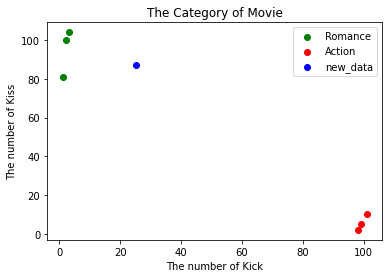

In [59]:
desclibing(dataset, inX)

파란 색의 경우는 어느 카테고리에 속할까요? 이 두 가지 특징 "킥 횟수"와 "키스 횟수"로 미루어 판단하건대, Romance에 가까운 작품으로 판단됩니다. 이를 좀 더 정량적으로 판단하면, 자기의 값과 비슷한, 인근 K개(임의의 수, 보통 20개 미만)의 데이터를 뽑아오고, 그 중에서 다수결을 통해 새로운 데이터의 분류 항목을 결정할 수 있을 것입니다. 이러한 분류 방법을 K-NN이라고 합니다. 

#  KNN 구현 순서

KNN의 알고리즘 순서는 다음과 같습니다. 

1. 우리가 분류항목을 알고자 하는 점(inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산
2. 오름 차순으로 거리의 길이를 정렬
3. inX와의 거리가 가장 짧은 K개의 아이템 추출
4. K개의 아이템에서 가장 많은 분류 항목 찾기
5. 해당 항목 반환


## 1. KNN 거리 공식 작성

<h3>- 우리가 분류항목을 알고자 하는 점 (inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산</h3>


거리공식은 유클리드 거리, 맨해튼 거리, 마할라노비스 거리를 구현하였습니다.

Euclidean Distance
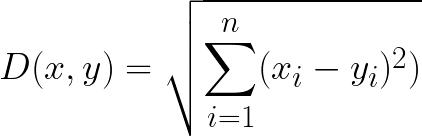

In [60]:
def Euclidean_Distance(dataset, inX):
    data_distance = []
    for i in range(len(dataset)):
        data_distance.append(np.sqrt((dataset[i][0] - inX[0])**2 + (dataset[i][1] - inX[1])**2 ))
    return data_distance

Manhattan Distance
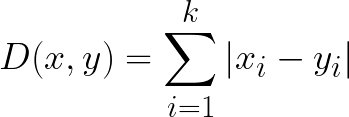

In [61]:
def Manhattan_Distance(dataset, inX):
    data_distance = []
    for i in range(len(dataset)):
        data_distance.append(np.abs((dataset[i][0] - inX[0]) + (dataset[i][1] - inX[1])))
    return data_distance

마할라노비스 거리 공식
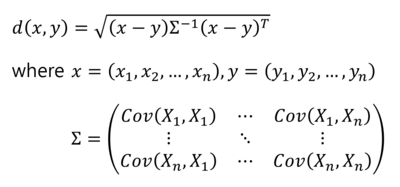

In [86]:
def Mahalanobis_Distance(dataset, inX):
    # 기존의 데이터와 예측할 데이터를 포함하여 공분산 구하기
    new_dataset = np.concatenate((dataset,[inX]),axis= 0)

    a = new_dataset[:,0]
    b = new_dataset[:,1]
    cov_metrix= np.cov(a,b)

    # 공분산 행렬의 역행렬
    inverse_cov_metrix = np.linalg.inv(cov_metrix)
    
    dist = []
    for i in range(len(dataset)):
        delta = np.array([dataset[i][0] - inX[0], dataset[i][1] - inX[1]])
        delta_T = np.transpose(delta)
        cal1 = np.dot(delta,inverse_cov_metrix)
        cal2 = np.dot(cal1,delta_T)
        D_squre = np.sqrt(cal2)
        dist.append(D_squre)
    return dist

In [90]:
Euclidean_Distance(dataset, inX)

[27.80287754891569,
 26.419689627245813,
 24.73863375370596,
 108.18964830333815,
 110.45361017187261,
 112.0446339634344]

In [91]:
Manhattan_Distance(dataset, inX)

[5, 10, 30, 1, 8, 12]

In [92]:
Mahalanobis_Distance(dataset, inX)

[0.5788633064089691,
 1.0020806958930701,
 3.0128310730703096,
 1.653894797100614,
 2.007084575299957,
 2.2900275049546033]

##  2. KNN 알고리즘 작성

In [93]:
def classify_knn(dists,dataset, inX,labels, K):
    print(dists)
    sorted_index = np.argsort(dists)
    sorted_labels = np.array(labels[sorted_index[:]])
    K_nearest_labels = sorted_labels[:K]
    count_dict = {}
    for label in K_nearest_labels:
        count_dict[label] = count_dict.get(label,0) + 1
        _labels, count_labels = np.array(list(count_dict.keys())), np.array(list(count_dict.values()))
    result = _labels[count_labels.argmax()]
    return desclibing(dataset, inX,result),result

In [94]:
# KNN을 COUNTER 모듈을 이용하여 구현
from collections import Counter

def classify_knn_Counter(dists,dataset, inX,labels, K):
    print(dists)
    sorted_index = np.argsort(dists) # 거리가 짧은 곳의 인덱스를 오름차순으로 정렬
    sorted_labels = np.array(labels[sorted_index[:]]) # 해당 인덱스에 해당 레이블 입력
    K_nearest_labels = sorted_labels[:K] # 가까운 K개만 추출
    count = Counter(K_nearest_labels)# 가장 많은 요소 추출
    result = max(count, key=count.get)
    return desclibing(dataset, inX,result),result

시각화

In [95]:
def desclibing(dataset, inX,label):
    plt.title("The Category of Movie")
    plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
                c='g')
    plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
                c='r')
    if label == 'Romance':
        plt.scatter(inX[0],inX[1],label="new_data",
                c='g')
    elif label == 'Action':
        plt.scatter(inX[0],inX[1],label="new_data",
                c='r')
    

    plt.xlabel('The number of Kick')
    plt.ylabel('The number of Kiss')
    plt.legend()
    plt.show()

<h2> 3. 구현 결과 </h2>

In [96]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
k = 4
inX = [52, 10]
dists_EUC = Euclidean_Distance(dataset, inX)
dists_MAN = Manhattan_Distance(dataset, inX)
dists_MAH = Mahalanobis_Distance(dataset, inX)

[106.00471687618433, 102.95630140987001, 87.41853350405736, 49.0, 47.265209192385896, 46.69047011971501]


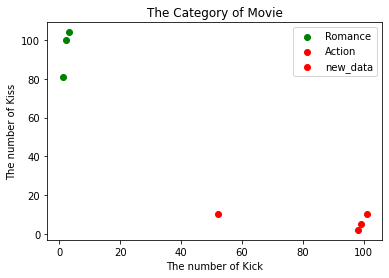

[106.00471687618433, 102.95630140987001, 87.41853350405736, 49.0, 47.265209192385896, 46.69047011971501]


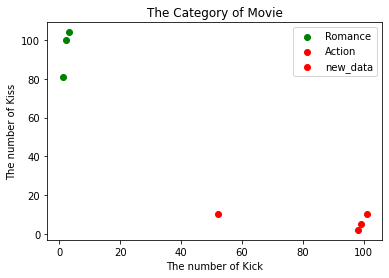

(None, 'Action')

In [97]:
classify_knn_Counter(dists_EUC,dataset,inX, labels, k) 
classify_knn(dists_EUC,dataset,inX, labels, k) 

[45, 40, 20, 49, 42, 38]


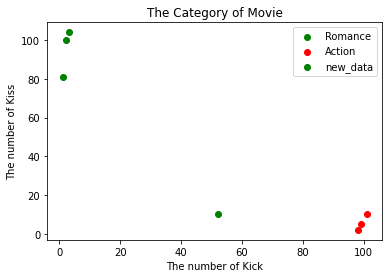

(None, 'Romance')

In [98]:
classify_knn_Counter(dists_MAN,dataset,inX, labels, k) 

[3.0680427226499933, 2.8024367310293203, 1.772473311728637, 2.8438863169310977, 2.453539018695724, 2.2336499161610934]


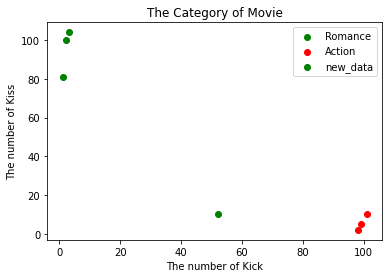

(None, 'Romance')

In [99]:
classify_knn_Counter(dists_MAH,dataset,inX, labels, k) 

In [100]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
k = 4
inX = [19, 72]
dists_EUC = Euclidean_Distance(dataset, inX)
dists_MAN = Manhattan_Distance(dataset, inX)
dists_MAH = Mahalanobis_Distance(dataset, inX)

[35.77708763999664, 32.7566787083184, 20.12461179749811, 102.80077820717118, 104.35037134576953, 105.55093557141026]


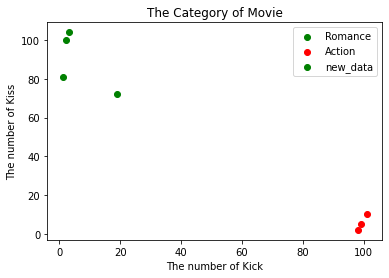

[16, 11, 9, 20, 13, 9]


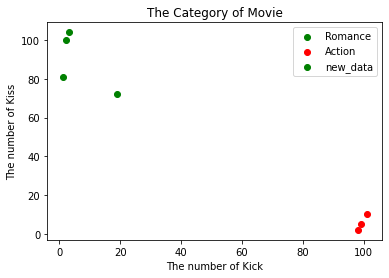

[2.058136613024007, 1.5047785478873044, 0.9105203287354701, 2.141372394328008, 1.7031063654392802, 1.5824600601341565]


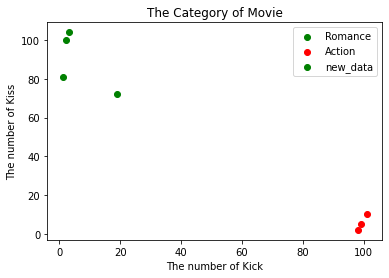

(None, 'Romance')

In [101]:
classify_knn(dists_EUC,dataset,inX, labels, k) 
classify_knn(dists_MAN,dataset,inX, labels, k) 
classify_knn(dists_MAH,dataset,inX, labels, k) 